# 数据导入

In [1]:
import pandas as pd #导入Pandas
import numpy as np #导入NumPy
df_fission = pd.read_csv('易速鲜花增长模型.csv') #载入数据
print('用户数:', df_fission.count()['用户码']) #查看数据条目数
df_fission.head() #显示头几行数据

用户数: 64000


,用户码,曾助力,曾拼团,曾推荐,设备,城市类型,R值,M值,裂变类型,是否转化
0,1,0,1,0,电脑,中小,10,138.00,情侣花享,0
1,2,0,1,0,电脑,一线,4,105.59,拼团盛放,0
2,3,0,1,0,电脑,一线,1,494.13,拼团盛放,1
3,4,0,1,1,手机,二线,10,148.45,没有促销,0
4,5,1,0,0,手机,二线,2,337.18,拼团盛放,0


# 可视化

/var/folders/6h/jgmm84rs59q33w5k9xh0t60c0000gp/T/ipykernel_91121/2443409102.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(),rotation=25) #X轴标签倾斜


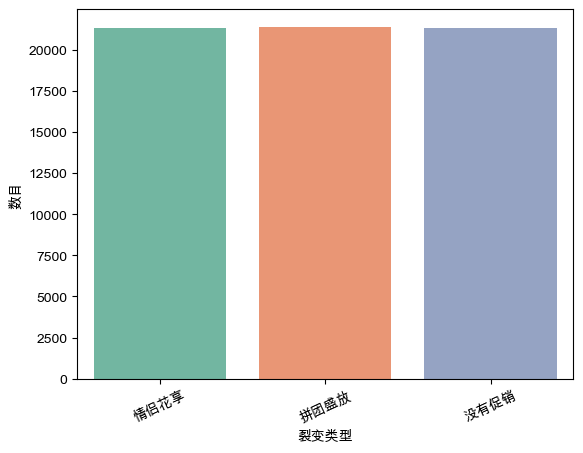

In [5]:
import matplotlib.pyplot as plt #导入pyplot模块
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang SC', 'Heiti TC']  # macOS 中文字体
import seaborn as sns #导入Seaborn
# 使用 hue 和 palette 让每个柱子颜色不同
fig = sns.countplot(x='裂变类型', data=df_fission, hue='裂变类型', palette='Set2', legend=False)
fig.set_xticklabels(fig.get_xticklabels(),rotation=25) #X轴标签倾斜
fig.set_ylabel("数目") #Y轴标题
plt.show() #显示图像

<BarContainer object of 3 artists>

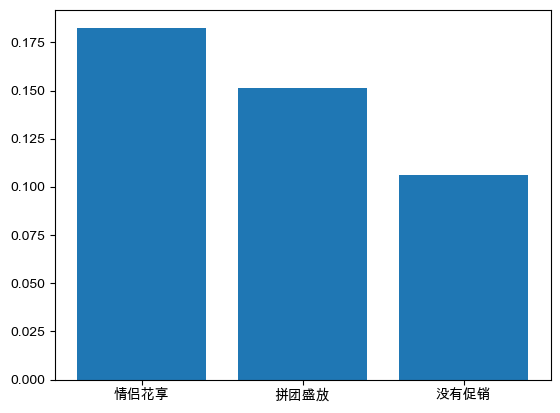

In [6]:
df_plot = df_fission.groupby('裂变类型').是否转化.mean().reset_index() #促销分组的转化率均值
plt.bar(df_plot['裂变类型'],df_plot['是否转化']) #不同促销转化均值柱状图

# 创建哑变量

In [7]:
df_dummies = df_fission.drop(['裂变类型'],axis=1) #在拆分哑变量前，先拿掉裂变类型
df_dummies = pd.get_dummies(df_dummies, drop_first = True) #为分类变量拆分哑变量
df_dummies['裂变类型'] = df_fission['裂变类型'] #把裂变类型放回去
df_fission = df_dummies.copy() #把哑变量数据集复制给元数据集
df_fission.head() #显示数据

,用户码,曾助力,曾拼团,曾推荐,R值,M值,是否转化,设备_手机,设备_电脑,城市类型_中小,城市类型_二线,裂变类型
0,1,0,1,0,10,138.00,0,False,True,True,False,情侣花享
1,2,0,1,0,4,105.59,0,False,True,False,False,拼团盛放
2,3,0,1,0,1,494.13,1,False,True,False,False,拼团盛放
3,4,0,1,1,10,148.45,0,True,False,False,True,没有促销
4,5,1,0,0,2,337.18,0,True,False,False,True,拼团盛放


# 构建特征和标签数据集

In [ ]:
# 使用 .copy() 创建副本，避免 SettingWithCopyWarning
df_discount = df_fission.query("裂变类型 == '情侣花享' | 裂变类型 == '没有促销'").copy()

df_discount.loc[(df_discount.裂变类型 == '情侣花享') & (df_discount.是否转化 == 1), '标签'] = 0 #有应答裂变组,裂变购买者
df_discount.loc[(df_discount.裂变类型 == '情侣花享') & (df_discount.是否转化 == 0), '标签'] = 1 #无应答裂变组,裂变未购买者
df_discount.loc[(df_discount.裂变类型 == '没有促销') & (df_discount.是否转化 == 1), '标签'] = 2 #有应答控制组,无裂变购买者
df_discount.loc[(df_discount.裂变类型 == '没有促销') & (df_discount.是否转化 == 0), '标签'] = 3 #无应答控制组,无裂变未购买者
df_discount.head()

,用户码,曾助力,曾拼团,曾推荐,R值,M值,是否转化,设备_手机,设备_电脑,城市类型_中小,城市类型_二线,裂变类型,标签
0,1,0,1,0,10,138.00,0,False,True,True,False,情侣花享,1.0
3,4,0,1,1,10,148.45,0,True,False,False,True,没有促销,3.0
5,6,0,1,1,10,56.48,0,False,True,False,True,情侣花享,1.0
6,7,1,1,1,2,551.98,0,False,False,False,False,情侣花享,1.0
8,9,1,0,1,7,29.99,1,False,True,False,True,情侣花享,0.0


In [12]:
X = df_discount.drop(['标签','是否转化', '用户码', '裂变类型'],axis=1) #特征集，Drop掉便签相关字段
y = df_discount.标签 #标签集
print(X)
print(y)

       曾助力  曾拼团  曾推荐  R值      M值  设备_手机  设备_电脑  城市类型_中小  城市类型_二线
0        0    1    0  10  138.00  False   True     True    False
3        0    1    1  10  148.45   True  False    False     True
5        0    1    1  10   56.48  False   True    False     True
6        1    1    1   2  551.98  False  False    False    False
8        1    0    1   7   29.99  False   True    False     True
...    ...  ...  ...  ..     ...    ...    ...      ...      ...
63991    1    0    1   2  509.72   True  False    False     True
63992    1    0    0   1   29.99   True  False     True    False
63993    0    1    1   2  499.62   True  False     True    False
63996    0    1    1   3  158.03   True  False    False     True
63998    1    0    0   1  196.02  False   True    False     True

[42613 rows x 9 columns]
0        1.0
3        3.0
5        1.0
6        1.0
8        0.0
        ... 
63991    1.0
63992    1.0
63993    0.0
63996    0.0
63998    1.0
Name: 标签, Length: 42613, dtype: float64


# 拆分数据集

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# 算法选择

In [15]:
import xgboost as xgb #导入xgboost模型
xgb_model = xgb.XGBClassifier() #创建xgboost模型
xgb_model.fit(X_train, y_train) #拟合xgboost模型

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softprob'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [16]:
uplift_probs = xgb_model.predict_proba(X_test) #预测测试集用户的分类概率
uplift_probs #显示4种概率

array([[0.03999997, 0.5550812 , 0.02573959, 0.37917924],
       [0.04470365, 0.46539155, 0.05123566, 0.43866912],
       [0.06468281, 0.4507986 , 0.03542706, 0.44909158],
       ...,
       [0.05752287, 0.45913216, 0.01730042, 0.4660446 ],
       [0.06766077, 0.47477573, 0.0562568 , 0.40130672],
       [0.03701369, 0.48224393, 0.0260155 , 0.4547269 ]], dtype=float32)

# 求增量分数

In [17]:
discount_uplift = X_test.copy() #构建增量分数数据集   
discount_uplift['P_TR'] = uplift_probs[:,0] #添加有应答裂变概率
discount_uplift['P_TN'] = uplift_probs[:,1] #添加无应答裂变概率
discount_uplift['P_CR'] = uplift_probs[:,2] #添加有应答控制概率
discount_uplift['P_CN'] = uplift_probs[:,3] #添加无应答控制概率
#计算增量分数
discount_uplift['增量分数'] = discount_uplift.eval('P_TR + P_CN - (P_TN + P_CR)') 
discount_uplift

,曾助力,曾拼团,曾推荐,R值,M值,设备_手机,设备_电脑,城市类型_中小,城市类型_二线,P_TR,P_TN,P_CR,P_CN,增量分数
15868,0,1,1,1,333.39,True,False,False,False,0.040000,0.555081,0.025740,0.379179,-0.161642
33225,1,0,0,7,29.99,True,False,False,True,0.044704,0.465392,0.051236,0.438669,-0.033254
30309,0,1,1,3,93.94,False,True,False,True,0.064683,0.450799,0.035427,0.449092,0.027549
43369,0,1,1,5,29.99,True,False,False,True,0.041088,0.453669,0.024968,0.480274,0.042725
52540,1,0,0,3,242.33,False,False,False,True,0.154472,0.428703,0.038588,0.378237,0.065418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51156,0,1,0,3,136.39,True,False,False,False,0.068530,0.454578,0.083840,0.393052,-0.076835
31954,0,1,0,8,207.98,False,True,False,True,0.056171,0.505546,0.059963,0.378319,-0.131019
29883,0,1,1,5,97.32,False,True,False,True,0.057523,0.459132,0.017300,0.466045,0.047135
62541,0,1,0,7,159.18,False,True,True,False,0.067661,0.474776,0.056257,0.401307,-0.062065
